In [ ]:
#Danting Yang SI618 Homework2 10713088

Q1. [5 points] Describe the dataset. 

1. 1. Load the data.

In [50]:
import pandas as pd
import numpy as np
invoices = pd.read_json('invoices.json')
items = pd.read_json('items.json')
purchases = pd.read_json('purchases.json')

2. How many total invoices were shipped?

In [51]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [52]:
invoices[~invoices.InvoiceNo.str.get(0).isin(['c'])].count()

InvoiceNo      25943
InvoiceDate    25943
CustomerID     22221
Country        25943
dtype: int64

There are 25943 invoices shipped. 

3. How many unique customers are there (regardless of shipped or not)?

In [53]:
len(invoices.CustomerID.unique())

4373

There are 4373 unique customers.

4. What the total number of unique items?

In [54]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [55]:
len(items.StockCode.unique())

4070

There are 4070 unique items.

5. Are there any columns with null values?

In [56]:
null_columns=items.columns[items.isnull().any()]
items[null_columns].isnull().sum()

Description    176
dtype: int64

In [57]:
null_columns=invoices.columns[invoices.isnull().any()]
invoices[null_columns].isnull().sum()

CustomerID    3722
dtype: int64

In [58]:
null_columns=purchases.columns[purchases.isnull().any()]
purchases[null_columns].isnull().sum()

Series([], dtype: float64)

Yes, columns with null values are listed above.

6. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [71]:
purchases.head()

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


In [60]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [75]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


I will join invoices table and purchases table together according to InvoiceNo using left join or right join. Because I just to keep one colunm for InvoiceNo. I will combine items table to the table we just merged according to Stockcode. I will let items table to match the newly merged table 

Q2. [10 points] Invoice Analysis 

1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.

In [68]:
invoices.groupby(['CustomerID'])['InvoiceNo'].count().nlargest(10)

CustomerID
14911.0    249
12748.0    225
17841.0    169
14606.0    130
13089.0    118
15311.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     77
Name: InvoiceNo, dtype: int64

2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.

In [76]:
purchases.shape

(541909, 3)

In [77]:
items.shape

(4070, 3)

In [73]:
pi = purchases.merge(invoices,on='InvoiceNo',how='left')
pi.shape

(545256, 6)

In [79]:
pi.groupby(['CustomerID'])['Quantity'].count().nlargest(10)

CustomerID
17841.0    7983
14911.0    5942
14096.0    5128
12748.0    4731
14606.0    2840
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: Quantity, dtype: int64

3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

I think it appears that the more invoices a customer have, the greater the total quantity of items. The two rankings are not exactly the same, but they are similar. There are 7 same customers in the two rankings. Besides, customers who rank top in the invoices number are also likely to have more quantities of items.

Q3. [10 points] Item Analysis 

1. What is the average item-unit price?

In [80]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [81]:
items.UnitPrice.mean()

6.905277886977952

2. What % of items are under $20?

In [103]:
items[items['UnitPrice'] < 20]['UnitPrice'].count()/items['UnitPrice'].count()*100

98.37837837837839

3. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis

(array([4.069e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.   ,  1106.206,  2212.412,  3318.618,  4424.824,  5531.03 ,
         6637.236,  7743.442,  8849.648,  9955.854, 11062.06 ]),
 <a list of 10 Patch objects>)

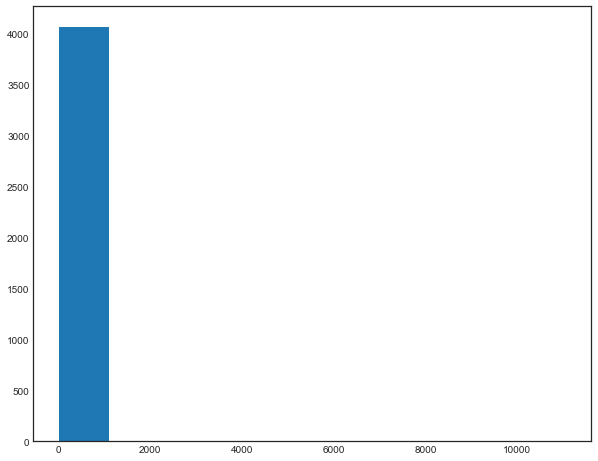

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
data = items.UnitPrice
plt.hist(data, label="Data")

NameError: name 'st' is not defined

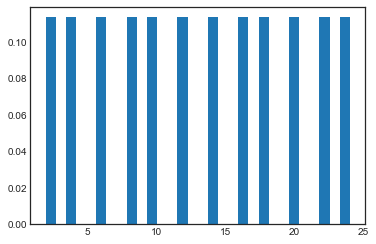

In [129]:
import matplotlib.pyplot as plt
data = items.UnitPrice
plt.hist(x, density=True, bins=30, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel('Probability')
plt.xlabel('Data')
plt.title("Histogram");

Q4. [25 points] Order Trends 

1. What are the top 10 most ordered items (Quantity) in descending order? 

In [116]:
pi.head()

,InvoiceNo,StockCodeSC,Quantity,InvoiceDate,CustomerID,Country
0,536365,SC85123A,6,12/1/10 8:26,17850.0,United Kingdom
1,536365,SC71053,6,12/1/10 8:26,17850.0,United Kingdom
2,536365,SC84406B,8,12/1/10 8:26,17850.0,United Kingdom
3,536365,SC84029G,6,12/1/10 8:26,17850.0,United Kingdom
4,536365,SC84029E,6,12/1/10 8:26,17850.0,United Kingdom


In [124]:
pi.Quantity.sort()

AttributeError: 'Series' object has no attribute 'sort'

In [122]:
pi[pi['Quantity']].sort_values(ascending=False)['StockCodeSC'].head()

KeyError: "None of [Int64Index([ 6,  6,  8,  6,  6,  2,  6,  6,  6, 32,\n            ...\n             4,  4,  8, 12,  4, 12,  6,  4,  4,  3],\n           dtype='int64', length=545256)] are in the [columns]"